In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Set a clean style for the plots
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-deep")

# =========================================
# === Database Connection and Data Loading
# =========================================

# Database credentials
user = "root"
password = "Root7878"
host = "localhost"
port = 3306
database = "DataWarehouse"

# Encode password safely (important if it has special chars like @ or $)
password = quote_plus(password)

# Create SQLAlchemy engine
try:
    engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
    
    # Load data into DataFrame
    query = "SELECT * FROM report_products;"
    df = pd.read_sql(query, engine)
    
    print("DataFrame Head:")
    print(df.head())
    print("-" * 50)
    
except Exception as e:
    print(f"Error connecting to the database or loading data: {e}")
    print("Please ensure your database credentials are correct and the database is running.")
    df = pd.DataFrame() # Create an empty DataFrame to prevent errors

DataFrame Head:
   product_key             product_name category     subcategory  cost  \
0            3   Mountain-100 Black- 38    Bikes  Mountain Bikes  1898   
1            4   Mountain-100 Black- 42    Bikes  Mountain Bikes  1898   
2            5   Mountain-100 Black- 44    Bikes  Mountain Bikes  1898   
3            6   Mountain-100 Black- 48    Bikes  Mountain Bikes  1898   
4            7  Mountain-100 Silver- 38    Bikes  Mountain Bikes  1912   

  last_sale_date  recency_in_months product_segment  lifespan  total_orders  \
0     2011-12-27                164  High-Performer        11            49   
1     2011-12-27                164  High-Performer        11            45   
2     2011-12-21                165  High-Performer        11            60   
3     2011-12-26                164  High-Performer        11            57   
4     2011-12-22                164  High-Performer        11            58   

   total_sales  total_quantity  total_customers  avg_selling_pri

In [ ]:
# ================================
# === Data Visualizations
# ================================

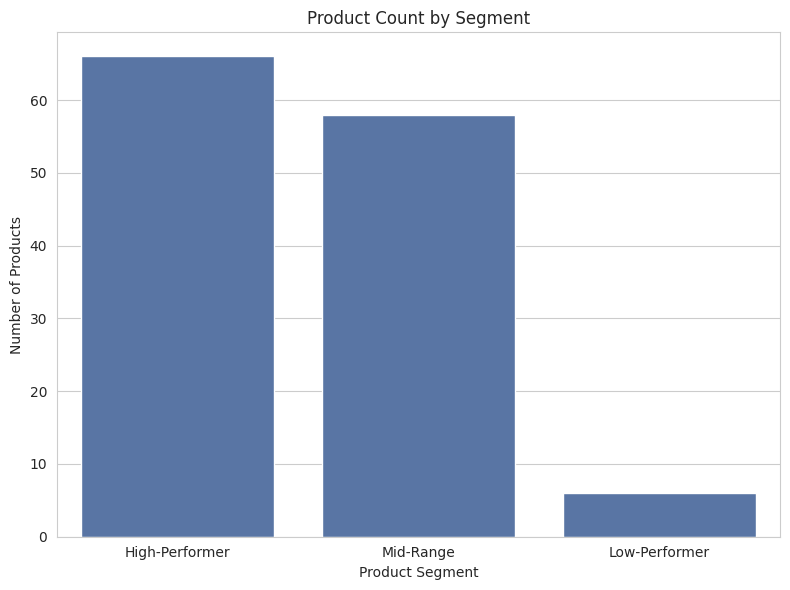

In [5]:
if not df.empty:
    # 1. Bar Chart: Product Count by Segment
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='product_segment', order=['High-Performer', 'Mid-Range', 'Low-Performer'])
    plt.title('Product Count by Segment')
    plt.xlabel('Product Segment')
    plt.ylabel('Number of Products')
    plt.tight_layout()
    plt.show()    
else:
    print("DataFrame is empty. No visualizations will be generated.")

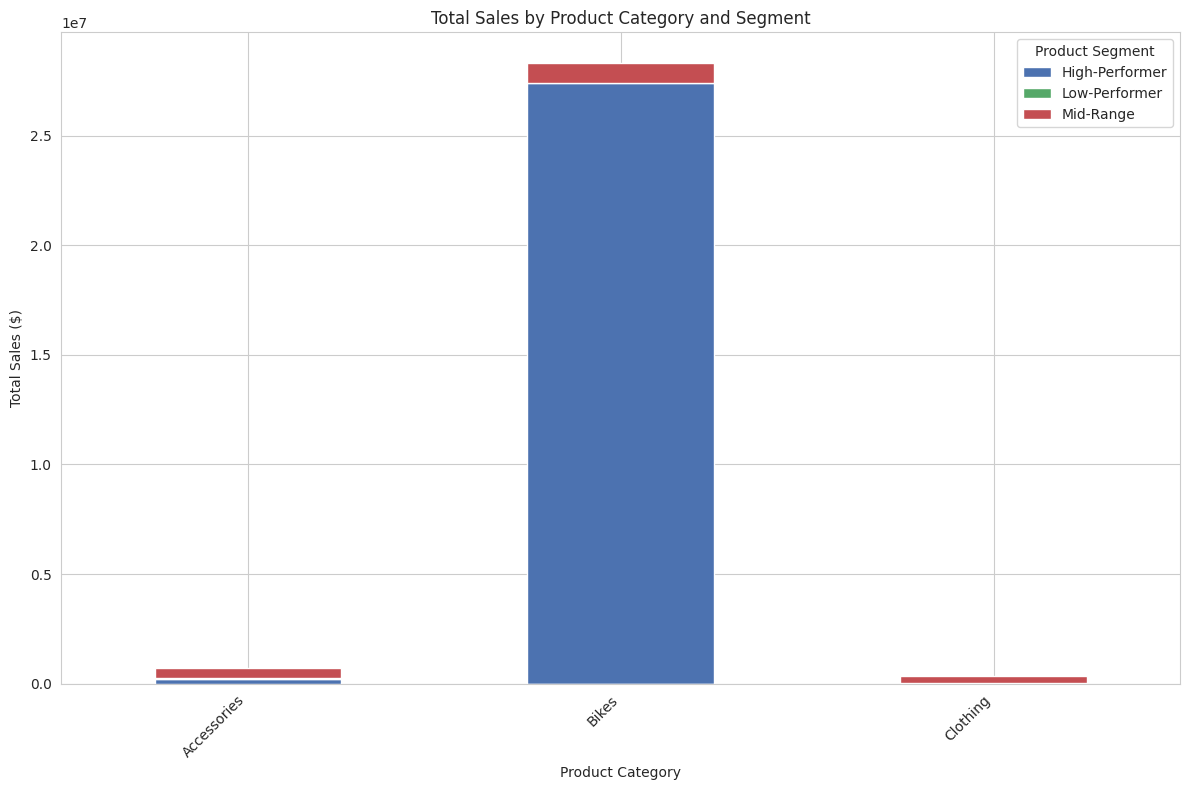

In [6]:
if not df.empty:
    # 2. Stacked Bar Chart: Total Sales by Product Category and Segment
    pivot_table = df.pivot_table(index='category', columns='product_segment', values='total_sales', aggfunc='sum')
    pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Total Sales by Product Category and Segment')
    plt.xlabel('Product Category')
    plt.ylabel('Total Sales ($)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Product Segment')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

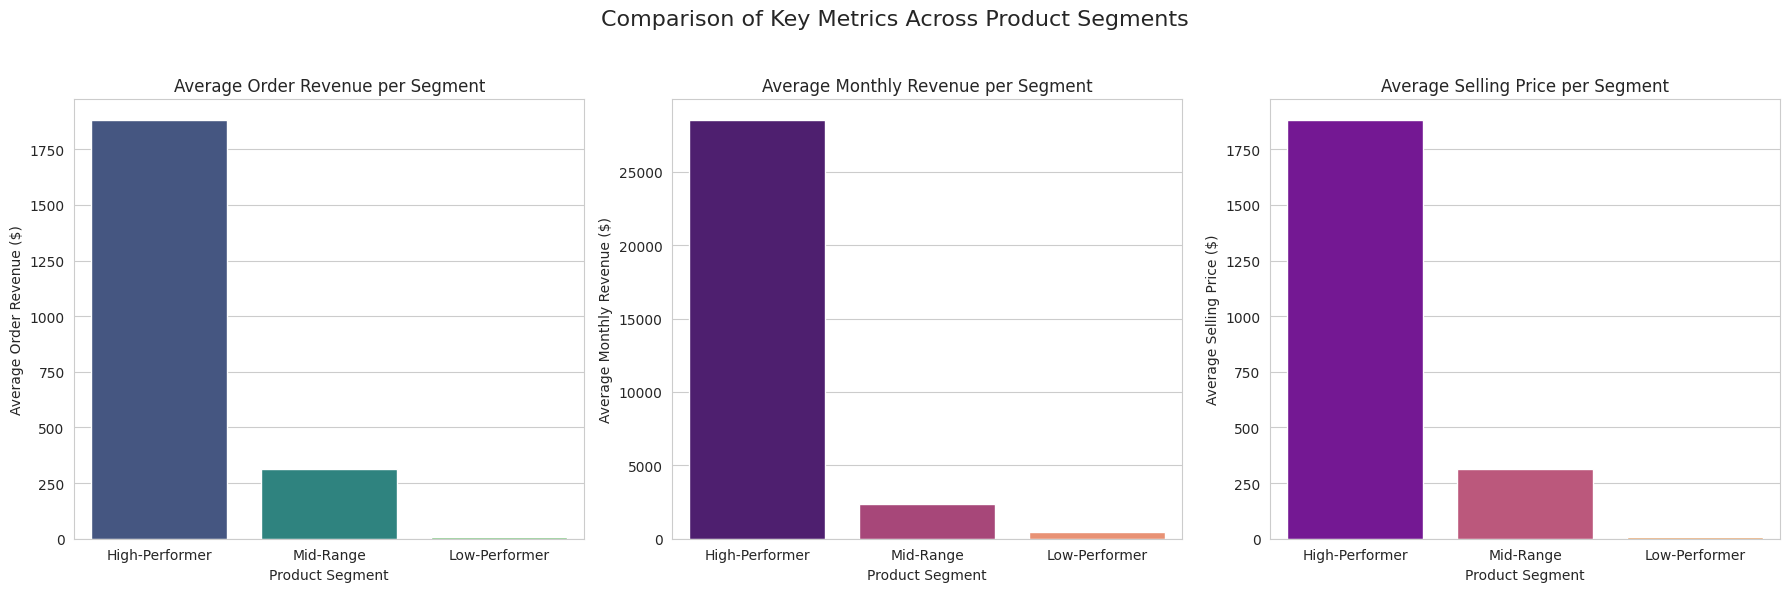

In [7]:
if not df.empty:
    # 3. Bar Chart: Average Revenue Metrics by Product Segment
    # Aggregate data
    avg_metrics = df.groupby('product_segment').agg(
        avg_order_revenue=('avg_order_revenue', 'mean'),
        avg_monthly_revenue=('avg_monthly_revenue', 'mean'),
        avg_selling_price=('avg_selling_price', 'mean')
    ).reindex(['High-Performer', 'Mid-Range', 'Low-Performer']) # Reorder for consistency

    # Plotting the three metrics in subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

    sns.barplot(x=avg_metrics.index, y=avg_metrics['avg_order_revenue'], ax=axes[0], palette="viridis", hue=avg_metrics.index, legend=False)
    axes[0].set_title('Average Order Revenue per Segment')
    axes[0].set_xlabel('Product Segment')
    axes[0].set_ylabel('Average Order Revenue ($)')

    sns.barplot(x=avg_metrics.index, y=avg_metrics['avg_monthly_revenue'], ax=axes[1], palette="magma", hue=avg_metrics.index, legend=False)
    axes[1].set_title('Average Monthly Revenue per Segment')
    axes[1].set_xlabel('Product Segment')
    axes[1].set_ylabel('Average Monthly Revenue ($)')

    sns.barplot(x=avg_metrics.index, y=avg_metrics['avg_selling_price'], ax=axes[2], palette="plasma", hue=avg_metrics.index, legend=False)
    axes[2].set_title('Average Selling Price per Segment')
    axes[2].set_xlabel('Product Segment')
    axes[2].set_ylabel('Average Selling Price ($)')

    plt.suptitle('Comparison of Key Metrics Across Product Segments', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

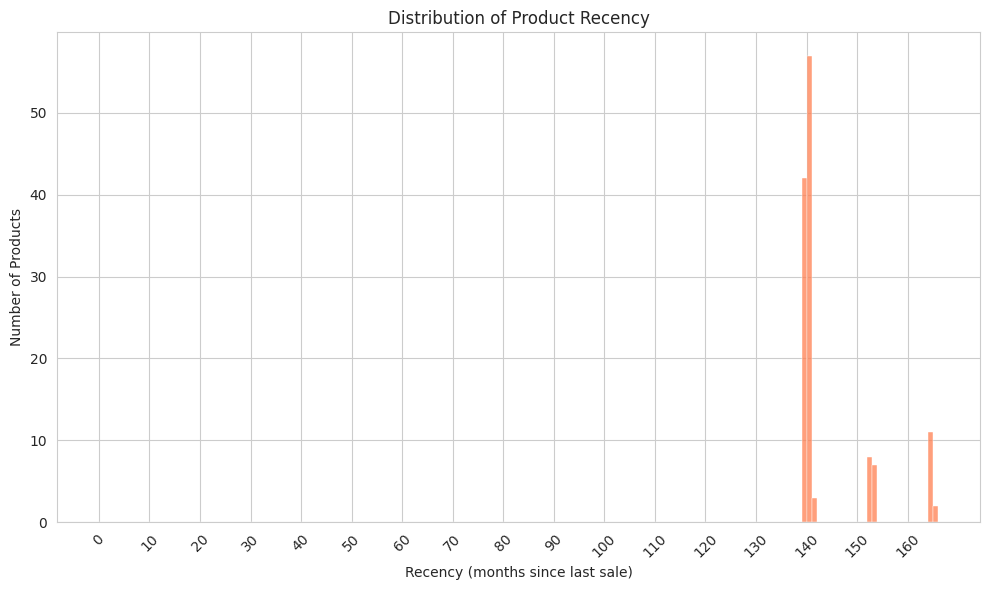

In [8]:
if not df.empty:
    # 4. Histogram: Distribution of Recency
    plt.figure(figsize=(10, 6))
    sns.histplot(df['recency_in_months'], bins=np.arange(0, df['recency_in_months'].max() + 2, 1), kde=False, color='coral')
    plt.title('Distribution of Product Recency')
    plt.xlabel('Recency (months since last sale)')
    plt.ylabel('Number of Products')
    plt.xticks(np.arange(0, df['recency_in_months'].max() + 2, 10), rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

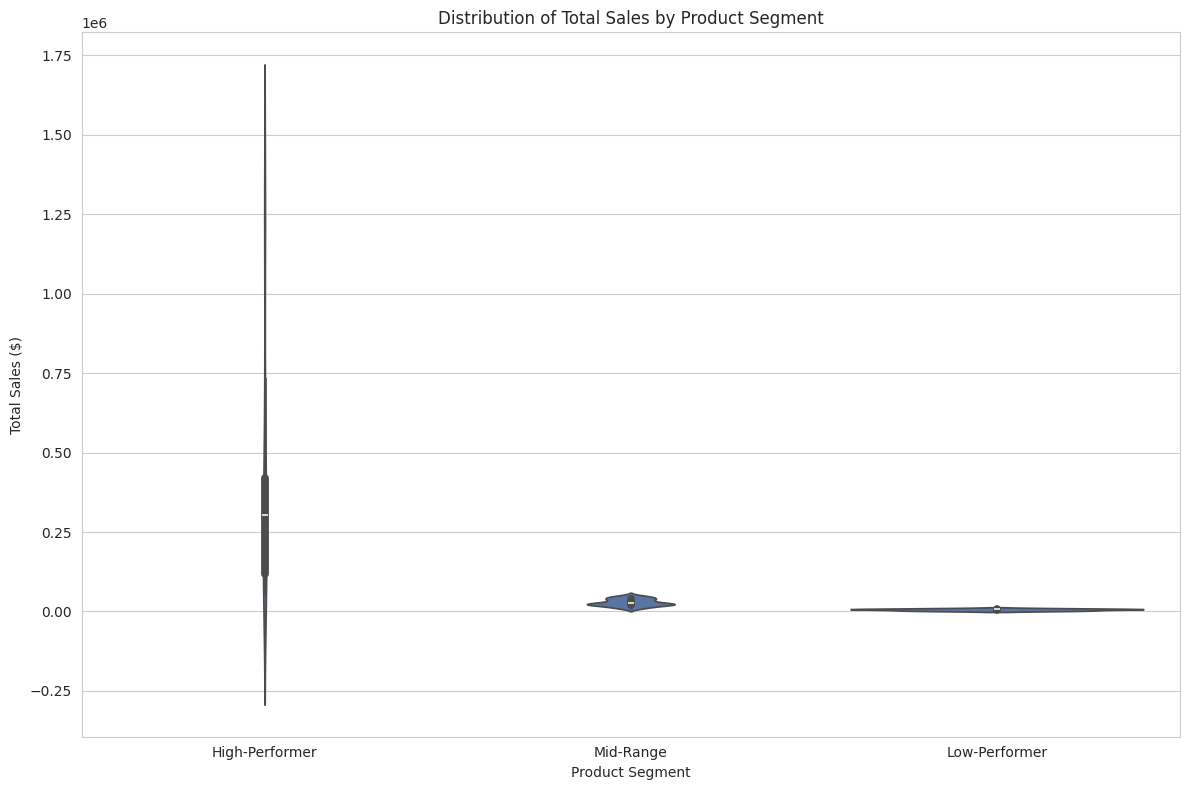

In [9]:
if not df.empty:
    # 5. Violin Plot: Distribution of Total Sales by Product Segment
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df, x='product_segment', y='total_sales', order=['High-Performer', 'Mid-Range', 'Low-Performer'])
    plt.title('Distribution of Total Sales by Product Segment')
    plt.xlabel('Product Segment')
    plt.ylabel('Total Sales ($)')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

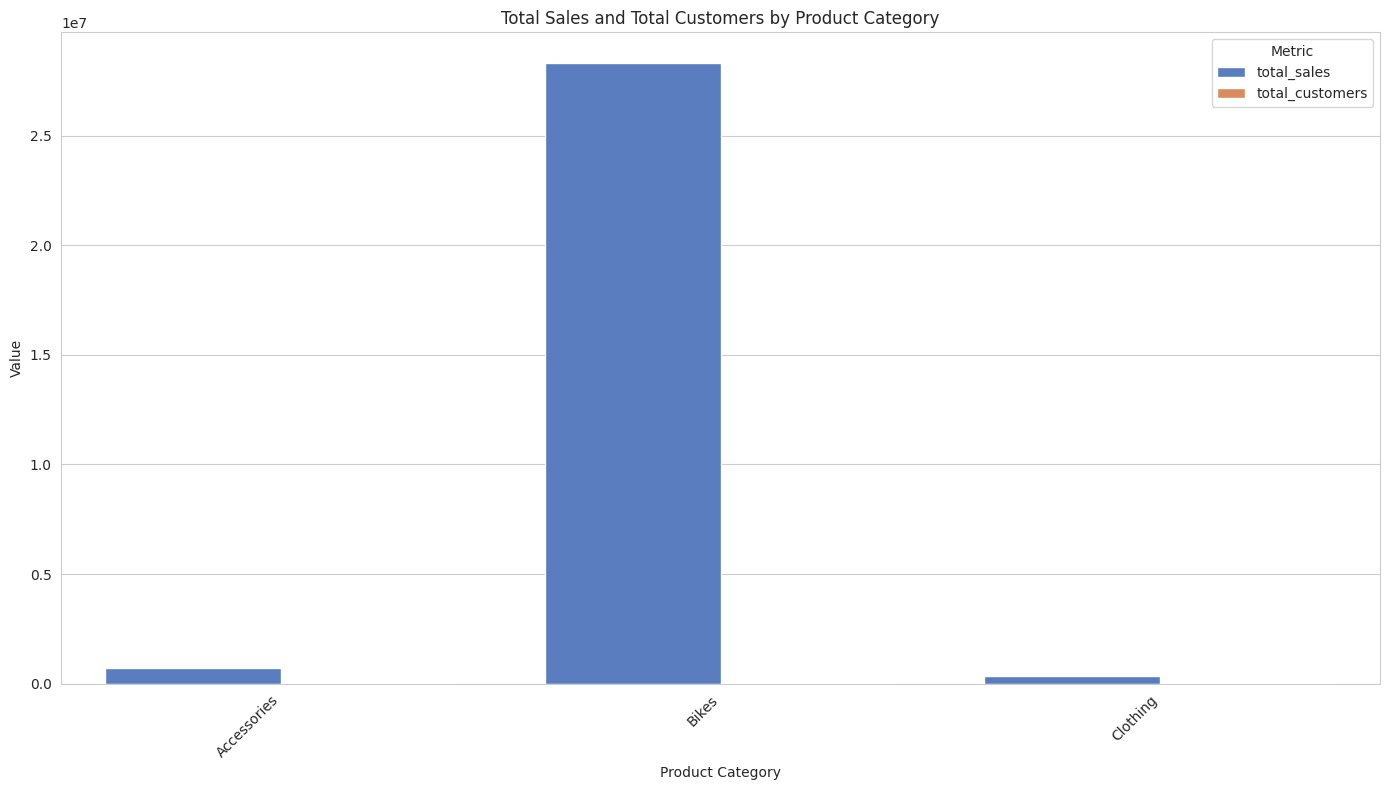

In [10]:
if not df.empty:
    # 6. Grouped Bar Chart: Sales and Customer Count by Product Category
    category_metrics = df.groupby('category').agg(
        total_sales=('total_sales', 'sum'),
        total_customers=('total_customers', 'sum')
    ).reset_index()

    category_metrics_melted = category_metrics.melt('category', var_name='Metric', value_name='Value')

    plt.figure(figsize=(14, 8))
    sns.barplot(x='category', y='Value', hue='Metric', data=category_metrics_melted, palette='muted')
    plt.title('Total Sales and Total Customers by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Value')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

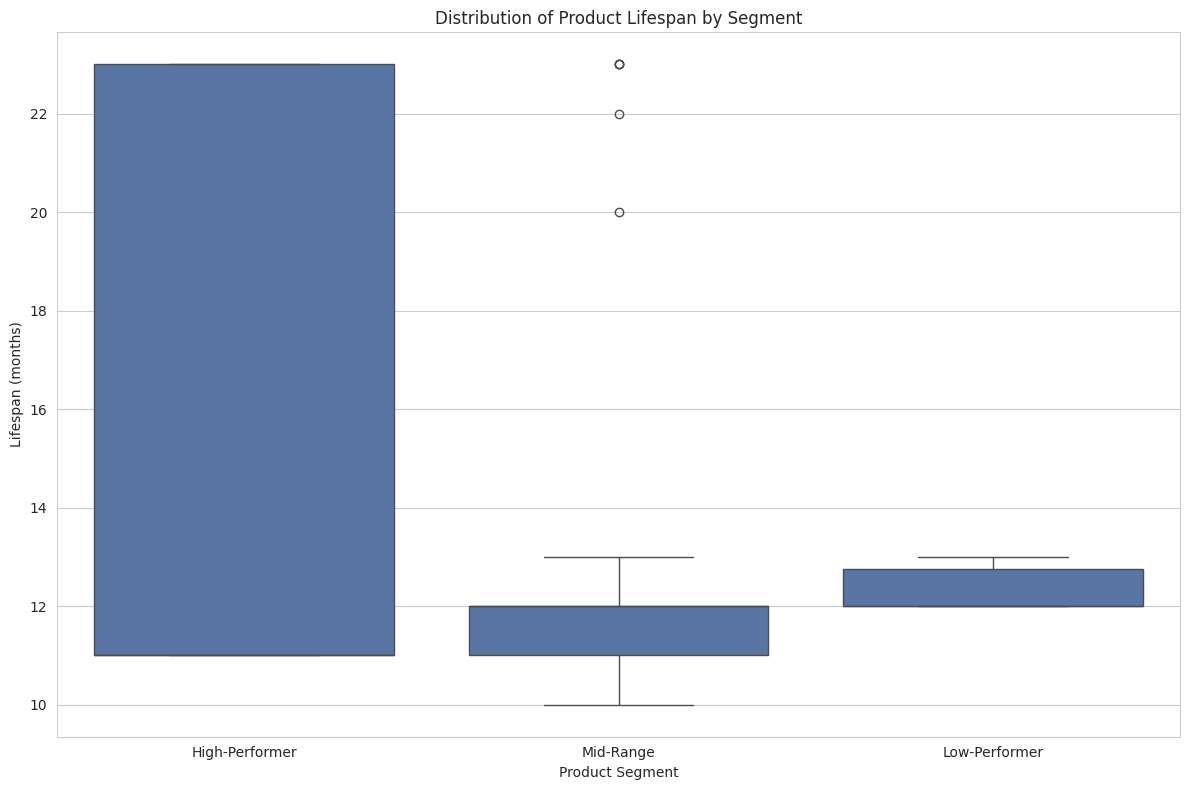

In [11]:
if not df.empty:
    # 7. Box Plot: Product Lifespan Distribution by Segment
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='product_segment', y='lifespan', order=['High-Performer', 'Mid-Range', 'Low-Performer'])
    plt.title('Distribution of Product Lifespan by Segment')
    plt.xlabel('Product Segment')
    plt.ylabel('Lifespan (months)')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")

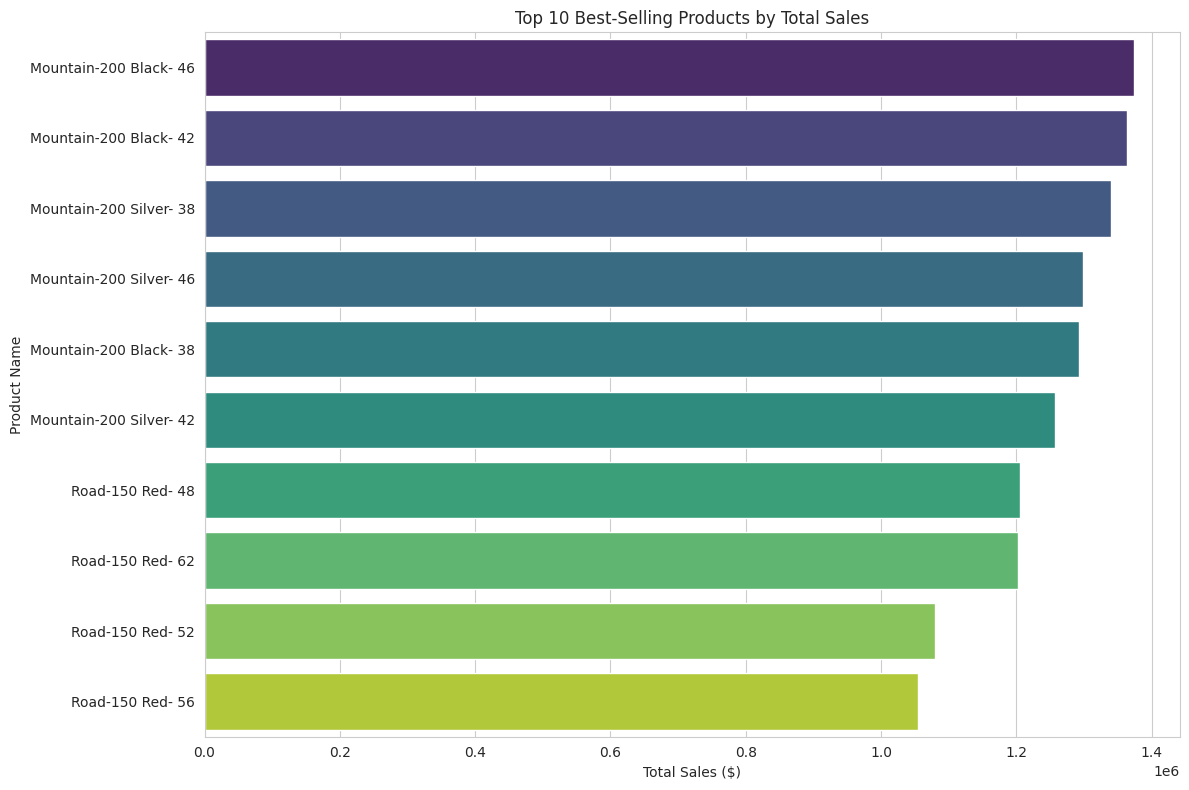

In [12]:
if not df.empty:
    # 8. Horizontal Bar Chart: Top 10 Best-Selling Products
    top_10_products = df.sort_values('total_sales', ascending=False).head(10)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='total_sales', y='product_name', data=top_10_products, palette='viridis', hue='product_name', legend=False)
    plt.title('Top 10 Best-Selling Products by Total Sales')
    plt.xlabel('Total Sales ($)')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty. No visualizations will be generated.")